# Tagesstatistik

Wir binden zunächst allgemeine Einstellungen ein, die für alle Notebooks gültig sind.

In [1]:
%run general_properties.ipynb

/home/jovyan/work/fonts/Caveat-Regular.ttf


## Daten einlesen

In [2]:
# Laden der minütlichen Information
#data = pd.read_csv('example_data/example.csv', delimiter=",",index_col=0, parse_dates=[0], na_values=['No CT'])
data = pd.read_csv('930450-Hauptverteiler-1H.csv', delimiter=",",index_col=0, parse_dates=[0], na_values=['No CT'])
#data

## Daten eingrenzen

Wir beschränken die verfügbaren Daten zunächst auf einen Zeitraum:

In [3]:
plotdata = data["2022-07-09":"2022-10-03"]

Da wir die Daten später gruppieren möchten, wandeln wir die Index-Spalte (momentan die Zeit) in eine normale Spalte um.

In [4]:
plotdata = plotdata.reset_index()

## Daten gruppieren
Gruppiert wird nun auf Tag und Stunde.

In [5]:
# Nur die drei Phasen des Hauptverteilers aus den Daten selektieren
bdata = plotdata.iloc[:,0:4]
# Neue Spalte der Summe der drei Phasen, da wir Gesamtverbrauch wissen wollen.
bdata = bdata.assign(HV=lambda x: x.iloc[:,1:4].sum(1))
# Neue Spalte für spätere Gruppierung: Tag des Monats
bdata = bdata.assign(Day=lambda x: x.iloc[:,0].dt.day)
# Neue Spalte für spätere Gruppierung: Stunde des Tages
bdata = bdata.assign(Hour=lambda x: x.iloc[:,0].dt.hour)

# Nach Tag und Stunde gruppieren
bdata = bdata.groupby(["Day","Hour"])[['HV']].mean()
# MultiIndex auflösen, indem neue Namen für die Indexspalten vergeben werden
bdata.index = bdata.index.set_names(['Day', 'Hour'])
# Indexspalten in normale Spalten konvertieren
bdata = bdata.reset_index()

### Daten als Boxplot

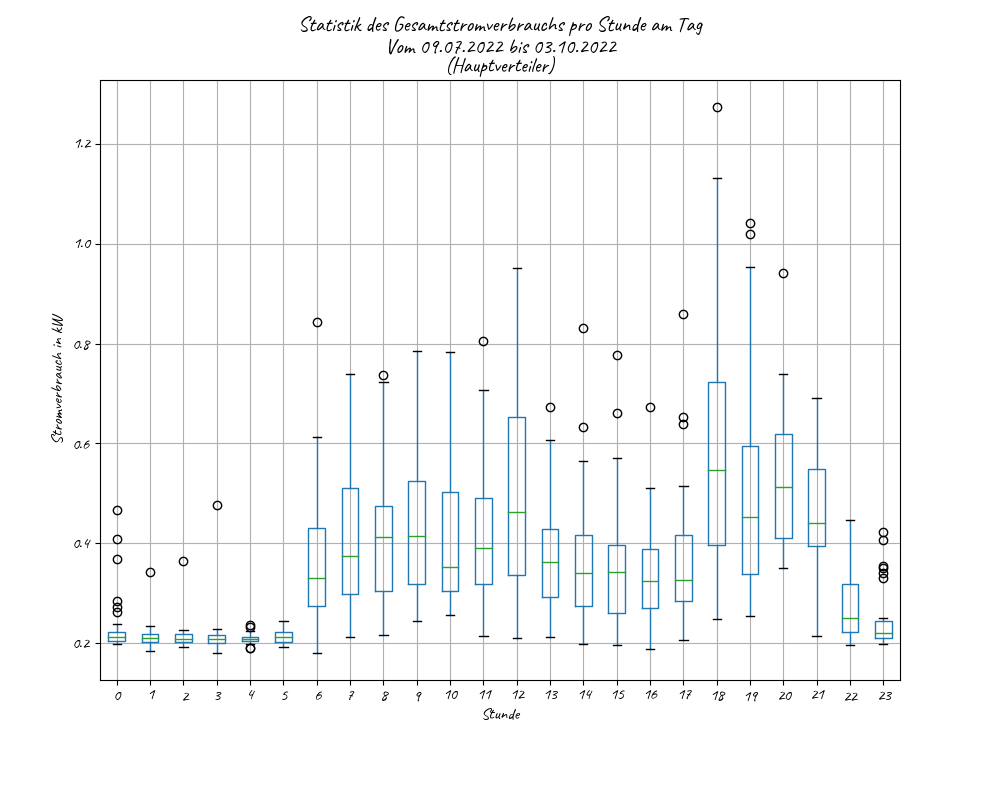

In [6]:
# Statistik über Stunden als Boxplot darstellen
fig, ax = plt.subplots(figsize=(10,8))
# Boxplot zeichnen
bdata.boxplot(by="Hour",column="HV", ax=ax)
# Hilfsvariable für Anzeige
zeitraum = "Vom %s bis %s" % (plotdata.iloc[:,0].min().strftime('%d.%m.%Y'),plotdata.iloc[:,0].max().strftime('%d.%m.%Y'))
# Ploteinstellungen
fig.suptitle("Statistik des Gesamtstromverbrauchs pro Stunde am Tag\n" + zeitraum, size=15)
ax.set_title('(Hauptverteiler)')
ax.set_xlabel("Stunde")
ax.set_ylabel("Stromverbrauch in kW")
# Speichern
fig.savefig("Tagesstatistik_im_Zeitraum_von_.pdf")